# 无压力下Workload聚合数据分析

In [3]:
import sys
sys.path.append('./tools')

from aggregation import *
import analyze
import display

pd.set_option('display.max_rows', 20) 

In [4]:
exp_root = "/home/ict/appProfile/data/redis_1/no_stress/redis_no_20231102130306"
qos_columns = [
    "app_redis_qos_qps_of_redis_get",
    "app_redis_qos_qps_of_redis_total",
    "app_redis_qos_qps_of_redis_set",
    "app_redis_qos_p99_latency_set",
    "app_redis_qos_p99_latency_get",
]

exp_data = read_from_dir(exp_root)
exp_data.set_workload_preprocess_funcs([
    filter_column_startswith(col_prefix=("stress", "vm", "app")),
    filter_column_useless(excol_prefix=("stress")),
    filter_row_noise(col_prefix=("app")),
])

keys = list(exp_data.exp["info_per_epoch"][0]["workloads"].keys())
keys

['redis_0',
 'redis_1',
 'redis_2',
 'redis_3',
 'redis_4',
 'redis_5',
 'redis_6',
 'redis_7',
 'redis_8']

In [5]:
# 选择QoS指标
qos_column = qos_columns[3]
# 相关性阈值
c = 0.90

df_workload = exp_data.agg_epoch()
df_workload

,vm_hypervisor_emulator_syscall_count_clone3,vm_hypervisor_emulator_syscall_count_fdatasync,vm_hypervisor_emulator_syscall_count_futex_time64,vm_hypervisor_emulator_syscall_count_madvise,vm_hypervisor_emulator_syscall_count_mmap,vm_hypervisor_emulator_syscall_count_mprotect,vm_hypervisor_emulator_syscall_count_munmap,vm_hypervisor_emulator_syscall_count_newfstatat,vm_hypervisor_emulator_syscall_count_poll_time64,vm_hypervisor_emulator_syscall_count_ppoll_time64,...,app_redis_qos_qps_of_redis_set,app_redis_qos_qps_of_redis_total,app_redis_qos_p99_latency_set,app_redis_qos_p99_latency_get,vm_hypervisor_vcpu_syscall_count_futex_time64,vm_hypervisor_vcpu_syscall_duration_futex_time64,vm_block_io_sector_offset_offset_vda,vm_cache_llc_capacity_numa_3,vm_mem_bandwidth_local_numa_3,vm_mem_bandwidth_total_numa_3
redis_0,0.703852,0.148185,1.778176,0.129630,0.129667,0.129667,0.055556,3.499935,315.494178,18.722103,...,4151.130781,45663.252904,0.990000,0.990006,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
redis_1,0.263132,0.131553,1.065744,0.052632,0.052632,0.052632,0.052632,3.500185,315.516638,18.513976,...,7893.327541,86824.721453,0.993696,0.993674,0.000000,0.000000,7.078957e+08,0.000000,0.000000,0.000000
redis_2,0.277750,0.083333,0.611049,0.069444,0.055556,0.055556,0.055556,3.500098,315.494901,19.208890,...,9640.896877,106047.854298,2.875195,2.874531,0.000000,0.000000,0.000000e+00,0.000237,0.000000,0.000000
redis_3,0.305556,0.027778,0.763868,0.222201,0.069444,0.069444,0.138861,3.499903,315.491262,18.041175,...,13185.467612,145047.463900,3.864773,3.863736,0.111111,5.395833,0.000000e+00,0.000000,0.000000,0.000000
redis_4,0.611208,0.111097,0.930417,0.097174,0.138910,0.138910,0.041646,3.500000,315.500022,22.194418,...,18553.586627,204091.775089,4.925797,4.925143,0.055556,0.236111,0.000000e+00,0.000000,0.000000,0.000000
redis_5,0.444458,0.111111,0.958333,0.111111,0.097222,0.097222,0.041667,3.500000,315.500013,22.250036,...,29599.778286,325623.976244,4.984243,4.984564,0.000000,0.000000,0.000000e+00,0.001342,0.003255,0.007595
redis_6,0.290323,0.129048,0.854903,0.290323,0.064516,0.064516,0.177419,3.499831,315.484752,19.128138,...,41081.757457,451875.140355,6.946417,6.946914,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
redis_7,0.289474,0.105250,1.065809,0.052658,0.065789,0.065789,0.105289,3.500277,315.524929,18.461889,...,50636.977081,557024.942397,12.464175,12.461954,0.000000,0.000000,0.000000e+00,0.000150,0.000000,0.002055
redis_8,0.236842,0.105263,0.815789,0.065789,0.052632,0.052632,0.039474,3.500092,315.508323,18.329429,...,57143.262575,628597.943944,22.249712,22.241325,0.000000,0.000000,0.000000e+00,0.000299,0.000000,0.003082


In [10]:
df_workload.columns

Index(['vm_hypervisor_emulator_syscall_count_clone3',
       'vm_hypervisor_emulator_syscall_count_fdatasync',
       'vm_hypervisor_emulator_syscall_count_futex_time64',
       'vm_hypervisor_emulator_syscall_count_madvise',
       'vm_hypervisor_emulator_syscall_count_mmap',
       'vm_hypervisor_emulator_syscall_count_mprotect',
       'vm_hypervisor_emulator_syscall_count_munmap',
       'vm_hypervisor_emulator_syscall_count_newfstatat',
       'vm_hypervisor_emulator_syscall_count_poll_time64',
       'vm_hypervisor_emulator_syscall_count_ppoll_time64',
       'vm_hypervisor_emulator_syscall_count_prctl',
       'vm_hypervisor_emulator_syscall_count_pread',
       'vm_hypervisor_emulator_syscall_count_pwrite',
       'vm_hypervisor_emulator_syscall_count_pwritev',
       'vm_hypervisor_emulator_syscall_count_read',
       'vm_hypervisor_emulator_syscall_count_recvmsg',
       'vm_hypervisor_emulator_syscall_count_rseq',
       'vm_hypervisor_emulator_syscall_count_rt_sigprocmask',

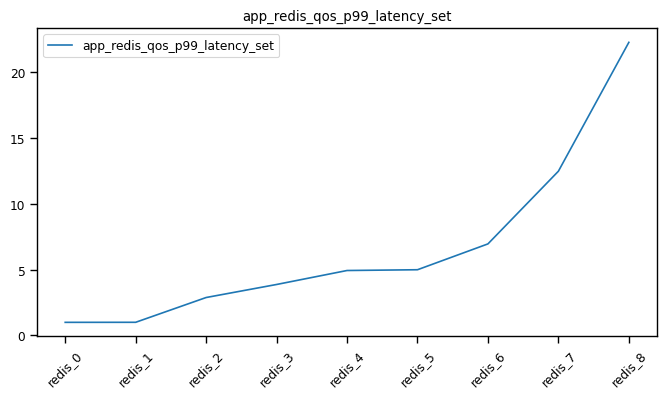

In [9]:
display.plt_by_column(df_workload, columns=[qos_columns[3]])

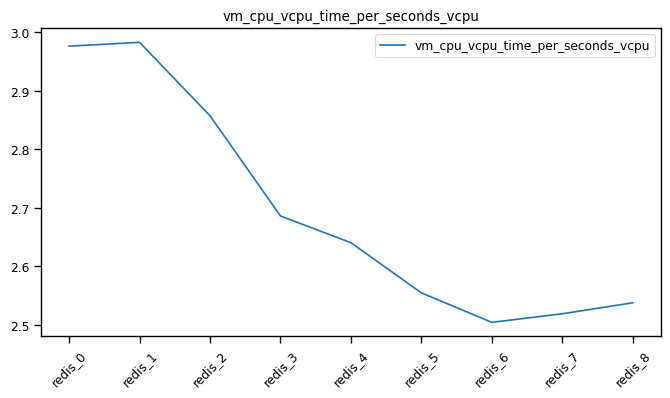

In [14]:
# display.plt_by_column(df_workload, columns=["vm_cpu_time_user", "vm_cpu_time_sys", "vm_cpu_vcpu_time_per_seconds_vcpu"])
display.plt_by_column(df_workload, columns=["vm_cpu_vcpu_time_per_seconds_vcpu"])

# 一、相关性分析

## (1) 皮尔逊相关性

In [ ]:
pearson_corr_matrix = analyze.pearson_correlation(df_workload)
pearson_corr_matrix

In [ ]:
display.plt_corr_heatmap(pearson_corr_matrix)

### 1. 相关性排序

In [ ]:
flat_corr_df = analyze.flatten_corr(
    pearson_corr_matrix,
    similarity_filter = [
        lambda x: x[x.abs() > c].dropna(axis=0, how='all'),
])
flat_corr_df

### 2. QoS 相关指标

In [ ]:
qos_corr = analyze.single_corr(pearson_corr_matrix, qos_column, similarity_filter = [
    lambda x: x[x.abs() > c].dropna(axis=0, how='all'),
])
qos_corr

In [ ]:
display.plt_by_column(df_workload, columns=list(qos_corr.index))

## 3. 相关性最大团

In [ ]:
G, cliques = analyze.cliques_from_corr(pearson_corr_matrix, threshold=c)
largest_clique = cliques[0]
largest_clique

In [ ]:
display.plt_clique_on_graph(G, largest_clique, scaling=1.25, label_pos=0.35)

## 4. 不同Workload的最大团

In [ ]:
import functools


largest_clique_dict = {}
for key in keys:
    # no stress workload always have one workload
    workload_info = exp_data.workloads_of(key)[0]
    corr_matrix = analyze.pearson_correlation(exp_data.workload_df(workload_info))
    G, cliques = analyze.cliques_from_corr(corr_matrix, threshold=0.95, abs=True)
    largest_clique_dict[key] = set(cliques[0])
    
# 判断与交集的差异
sets = list(largest_clique_dict.values())
common_clique = functools.reduce(lambda a, b: a.intersection(b), sets)
print("common_clique len:", len(common_clique))
diff_largest_clique = {k : len(v) - len(common_clique) for k,v in largest_clique_dict.items()}
diff_largest_clique

In [ ]:
display.plt_clique_on_graph(G, common_clique, scaling=1.25, label_pos=0.35)

## (2) 余弦相似性

In [ ]:
cos_similarity_matrix = analyze.cosine_similarity(df_workload)
cos_similarity_matrix

In [ ]:
display.plt_corr_heatmap(cos_similarity_matrix)

### 1. 相似性排序

In [ ]:
flat_corr_df = analyze.flatten_corr(cos_similarity_matrix, similarity_filter = [
    lambda x: x[x > c].dropna(axis=0, how='all'),
])
flat_corr_df

### 2. QoS 相似指标

In [ ]:
qos_corr = analyze.single_corr(cos_similarity_matrix, qos_column, similarity_filter = [
    lambda x : x[x.abs() > c].dropna(axis=0, how='all'),
    lambda x : x.drop(qos_columns, errors='ignore'),
])
qos_corr

In [ ]:
display.plt_by_column(df_workload, columns=list(qos_corr.index))

### 3. 相似性最大团

In [ ]:
G, cliques = analyze.cliques_from_corr(cos_similarity_matrix, threshold=0.99)
largest_clique = cliques[0]
largest_clique

In [ ]:
display.plt_clique_on_graph(G, largest_clique, scaling=1.25, label_pos=0.35)

### 4. 不同Workload的最大团

In [ ]:
import functools


largest_clique_dict = {}
for key in keys:
    # no stress workload always have one workload
    workload_info = exp_data.workloads_of(key)[0]
    corr_matrix = analyze.cosine_similarity(exp_data.workload_df(workload_info))
    G, cliques = analyze.cliques_from_corr(corr_matrix, threshold=c)
    largest_clique_dict[key] = set(cliques[0])
    
# 判断与交集的差异
sets = list(largest_clique_dict.values())
common_clique = functools.reduce(lambda a, b: a.intersection(b), sets)
print(len(common_clique))
diff_largest_clique = {k : len(v) - len(common_clique) for k,v in largest_clique_dict.items()}
diff_largest_clique

In [ ]:
display.plt_clique_on_graph(G, common_clique, scaling=1.25, label_pos=0.35)